# CSE 351 - Data Science Project
## What Makes People in a Country Happy?
### By Felix Zhu, Kevin Chen, Tommy Lin

## Importing Libraries and Files
<p>We imported all the Python libraries needed to do our project. We also imported the CSV files which are our datasets.</p>

In [1]:
# Importing some Python libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Used for model 1 - Linear Regression model
from sklearn.linear_model import LinearRegression

# Used for model 2 - Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor

# Used for model 3 - Random Forest model
from sklearn.ensemble import RandomForestRegressor

# MSE is used to calculate the amount of error the predicted values are
# compared to the actual values. 
from sklearn.metrics import mean_squared_error

import random

In [2]:
# Importing our datasets that contain information about world happiness statistics
df2015 = pd.read_csv('world_happiness/2015.csv')
df2016 = pd.read_csv('world_happiness/2016.csv')
df2017 = pd.read_csv('world_happiness/2017.csv')
df2018 = pd.read_csv('world_happiness/2018.csv')
df2019 = pd.read_csv('world_happiness/2019.csv')

## Observing the Data

In [3]:
# Displaying the 2015 dataset to visualize what features there are.

print("This is the 2015 dataset:")
df2015.head()

# Features include Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita),
# Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

# These 12 features are provided by the 2015 dataset.

This is the 2015 dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Displaying the 2016 dataset to visualize what features there are.

print("This is the 2016 dataset:")
df2016.head()

# Features include Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval,
# Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

# These 13 features are provided by the 2016 dataset.
# Compared to the 2015 dataset, we can already see some noticable differences in features. 
# For example, in the 2016 dataset, we now have 'Lower Confidence Interval' and 'Upper Confidence Interval'.
# However, compared to the 2015 dataset, the 2016 dataset does not have the feature 'Standard Error'.
# These three features may need to be removed from their respective datasets when we clean the data.

This is the 2016 dataset:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
# Displaying the 2017 dataset to visualize what features there are.

print("This is the 2017 dataset:")
df2017.head()

# There are 12 features provided by the 2017 dataset.
# On initial observation, there are features that are equal to the features we have already seen, but the name
# of the features are spelled differently. For example, "Happiness Rank" appears are "Happiness.Rank" in this
# dataset. We will need to rename these features later on for more uniformity among all the datasets.

# This 2017 dataset introduces two new features that are unseen from the two previous datasets, which are
# "Whisker.high" and "Whisker.low". We may need to drop these features from the dataset when cleaning the data.
# We also notice that there is no "Region" feature in this dataset.

This is the 2017 dataset:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
# Displaying the 2018 dataset to visualize what features there are.

print("This is the 2018 dataset:")
df2018.head()

# There are only 9 features provided by the 2018 dataset, compared to the 2015 (12), 2016 (13), 2017 (12) datasets.
# We noticed that there is a feature "Country or region" that could possibly combine the two features "Country" and 
# "Region". However, based on observing the data, we believe that the feature "Region" from the 2015 and 2016 datasets
# don't provide any useful additional information to us, so we can remove the feature from those datasets later.

# Some features in the 2018 dataset also may be named differently from their corresponding features in the previously
# observed datasets. For example, "Score" in the 2018 dataset may be the "Happiness Score" from other datasets.
# "Social support" feature may actually be the "Family" feature. "Perceptions of corruption" may actually be the
# "Dystopia Residual" feature. "Freedom to make life choices" may actually be the "Freedom" feature.
# All of these mentioned features will have to be renamed later on to ensure uniformity among the datasets.

This is the 2018 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
# Displaying the 2019 dataset to visualize what features there are.

print("This is the 2019 dataset:")
df2019.head()

# These are the same 9 features as the 2018 dataset. 
# The same details mentioned for the 2018 dataset could be applied to this dataset too.

This is the 2019 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Exploratory Data Analysis

## Cleaning Data
<p>To clean our data, we renamed the columns that way all the names are consistent. We also check for any NULL values and replaced them with the mean value of the column. This way the data does not get changed.</p>

<p>We added the Year column so it is easier for us to use Python library functions later on in our project.</p>

<p>We removed the columns that are not needed (Standard Error, Region, Lower and Upper Confidence Level, Whisker.high and low). Even though the 2018 and 2019 data does not have the Dystopia Residual column, we were able to calculate it by calculating the difference of the happiness score and the sum of all the happiness features.</p>

<p>Note: The 2015, 2016, 2017 data have a column named Family and the 2018 and 2019 data have a column named Social support. Since they are similar features, we named the columns in the data set, 'Family or Social Support.'</p>

<p>The names of the countries are inconsistent through some of the data sets we imported. We changed the names so that it is the same across all data sets. We also removed any country that does not appear from 2015-2019.</p>

In [8]:
# Country
df2018.rename(columns = {'Country or region': 'Country'}, inplace = True)
df2019.rename(columns = {'Country or region': 'Country'}, inplace = True)

# Happiness Rank
df2017.rename(columns = {'Happiness.Rank': 'Happiness Rank'}, inplace = True)
df2018.rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)
df2019.rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)

# Happiness Score
df2017.rename(columns = {'Happiness.Score': 'Happiness Score'}, inplace = True)
df2018.rename(columns = {'Score': 'Happiness Score'}, inplace = True)
df2019.rename(columns = {'Score': 'Happiness Score'}, inplace = True)

# Economy
df2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
df2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
df2017.rename(columns = {'Economy..GDP.per.Capita.': 'GDP per Capita'}, inplace = True)
df2018.rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)
df2019.rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)

# Freedom
df2018.rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)
df2019.rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)

# Perceptions of Corruption
df2015.rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
df2016.rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
df2017.rename(columns = {'Trust..Government.Corruption.': 'Trust'}, inplace = True)
df2018.rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)
df2019.rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)

# Family or Social Support
df2015.rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
df2016.rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
df2017.rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
df2018.rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)
df2019.rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)

# Life Expectancy
df2015.rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
df2016.rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
df2017.rename(columns = {'Health..Life.Expectancy.': 'Life Expectancy'}, inplace = True)
df2018.rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)
df2019.rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)

# Drop columns that we do not need
df2015.drop('Standard Error', inplace = True, axis = 1)
df2015.drop('Region', inplace = True, axis = 1)
df2016.drop('Region', inplace = True, axis = 1)
df2016.drop('Lower Confidence Interval', inplace = True, axis = 1)
df2016.drop('Upper Confidence Interval', inplace = True, axis = 1)
df2017.drop('Whisker.high', inplace = True, axis = 1)
df2017.drop('Whisker.low', inplace = True, axis = 1)

# Adding the year column
df2015['Year'] = 2015
df2016['Year'] = 2016
df2017['Year'] = 2017
df2018['Year'] = 2018
df2019['Year'] = 2019

In [9]:
# The 2018 data set has a NULL value in the Trust column!
trust_average = df2018['Trust'].mean()

# Replace Null values with the mean value of the Trust column
df2018['Trust'].fillna(trust_average, inplace=True)

In [10]:
# Dystopia Residual
df2017.rename(columns = {'Dystopia.Residual': 'Dystopia Residual'}, inplace = True)
df2018["Dystopia Residual"] = df2018["Happiness Score"] - df2018["GDP per Capita"] - df2018["Family or Social Support"] - df2018["Life Expectancy"] - df2018["Freedom"] - df2018["Generosity"] - df2018["Trust"]
df2019["Dystopia Residual"] = df2019["Happiness Score"] - df2019["GDP per Capita"] - df2019["Family or Social Support"] - df2019["Life Expectancy"] - df2019["Freedom"] - df2019["Generosity"] - df2019["Trust"]

In [11]:
# Reorganizing column for best output and readability
df2015 = df2015.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2016 = df2016.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2017 = df2017.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2018 = df2018.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2019 = df2019.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])

In [12]:
# Create a list from existing df
df_list = [df2015, df2016, df2017, df2018, df2019]

# Merge the df into one big df
merged_df = pd.concat(df_list, ignore_index=True)

In [13]:
# When performing analysis on the dataset in a later part, we stumbled upon the
# error of some countries not having any happiness rank and/or score in one or 
# more years from 2015 to 2019, so we decided to actually check which countries 
# did not appear in all five years of the data.

# First, we have an array for iterating through the years.
years = [2015,2016,2017,2018,2019]

# Creating a dictionary to store the counts of countries through the years.
country_counts = {}

# Iterating through each year.
for year in years:
    # Creating a dataframe for each respective year.
    yearly_df = merged_df[merged_df['Year'] == year]
    # Iterating through each country in the yearly dataframe.
    for country in yearly_df['Country'].unique():
        # If the country appears in the dictionary, then increment by one.
        if country in country_counts:
            country_counts[country] += 1
        else:
            # if the country doesn't exist in the dictionary, then initialize to 1.
            country_counts[country] = 1

# We want an array to store the countries that don't appear in all five years.
# We do this by checking the size of the count in the dictionary to see.
incomplete_countries = []
for country, count in country_counts.items():
    if count < len(years):
        incomplete_countries.append(country)

print("These are the countries that don't show up in all 5 years:\n",incomplete_countries)
print("These are how many countries don't show up in all 5 years:",len(incomplete_countries))

These are the countries that don't show up in all 5 years:
 ['Oman', 'Taiwan', 'Suriname', 'Trinidad and Tobago', 'North Cyprus', 'Hong Kong', 'Somaliland region', 'Macedonia', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Sudan', 'Djibouti', 'Angola', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Somaliland Region', 'Namibia', 'South Sudan', 'Taiwan Province of China', 'Hong Kong S.A.R., China', 'Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia', 'Gambia']
These are how many countries don't show up in all 5 years: 29


In [14]:
# There are some inconsistencies in the name of the countries from one
# year to another so renaming certain regions that stood out when
# observing the datasets. Examples: Hong Kong, Taiwan, Trinidad & Tobago

replace_dict = {
    'Somaliland region': 'Somaliland Region',
    'North Cyprus': 'Northern Cyprus',
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'North Macedonia': 'Macedonia'
}

df2015['Country'].replace(replace_dict, inplace=True)
df2016['Country'].replace(replace_dict, inplace=True)
df2017['Country'].replace(replace_dict, inplace=True)
df2018['Country'].replace(replace_dict, inplace=True)
df2019['Country'].replace(replace_dict, inplace=True)

# Update both df_list and merged_df
df_list = [df2015, df2016, df2017, df2018, df2019]
merged_df = pd.concat(df_list, ignore_index=True)

In [15]:
# Displaying the incomplete countries that don't appear in all 5 years
# to see if there is any changes.

country_counts = {}

for year in years:
    yearly_df = merged_df[merged_df['Year'] == year]
    for country in yearly_df['Country'].unique():
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1

incomplete_countries = []
for country, count in country_counts.items():
    if count < len(years):
        incomplete_countries.append(country)
print("These are the countries that don't show up in all 5 years:\n",incomplete_countries)
print("These are how many countries don't show up in all 5 years:",len(incomplete_countries))
# Remove all incomplete countries
df2015.drop(df2015[df2015['Country'].isin(incomplete_countries)].index, inplace=True)
df2016.drop(df2016[df2016['Country'].isin(incomplete_countries)].index, inplace=True)
df2017.drop(df2017[df2017['Country'].isin(incomplete_countries)].index, inplace=True)
df2018.drop(df2018[df2018['Country'].isin(incomplete_countries)].index, inplace=True)
df2019.drop(df2019[df2019['Country'].isin(incomplete_countries)].index, inplace=True)

# Iterate through the 'Happiness Rank' column and assign new ranks
rank = 1
for i, row in df2015.iterrows():
    df2015.at[i, 'Happiness Rank'] = rank
    rank += 1
df2015 = df2015.reset_index(drop=True)

rank = 1
for i, row in df2016.iterrows():
    df2016.at[i, 'Happiness Rank'] = rank
    rank += 1
df2016 = df2016.reset_index(drop=True)

rank = 1
for i, row in df2017.iterrows():
    df2017.at[i, 'Happiness Rank'] = rank
    rank += 1
df2017 = df2017.reset_index(drop=True)

rank = 1
for i, row in df2018.iterrows():
    df2018.at[i, 'Happiness Rank'] = rank
    rank += 1
df2018 = df2018.reset_index(drop=True)

rank = 1
for i, row in df2019.iterrows():
    df2019.at[i, 'Happiness Rank'] = rank
    rank += 1
df2019 = df2019.reset_index(drop=True)


# Update df_list and merge_df <- WE ARE USING THESE TWO VARIABLES FROM NOW ON. DO NOT CHANGE THE ORIGINAL DF VARS!!
df_list = [df2015, df2016, df2017, df2018, df2019]
merged_df = pd.concat(df_list, ignore_index=True)

# When looking at the countries that don't show up in all five years, the number of 
# countries that fit this description dropped from 29 to 18. This is after we finished
# renaming the countries that had different spellings from one year to the next.


# These are still 18 countries that will most likely be overlooked in our future analysis
# of the dataset(s) since they appear as values that don't have a more defined contribution
# to our analysis of countries as a whole.

These are the countries that don't show up in all 5 years:
 ['Oman', 'Suriname', 'Somaliland Region', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Sudan', 'Djibouti', 'Angola', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Namibia', 'South Sudan', 'Gambia']
These are how many countries don't show up in all 5 years: 18


#### Printing these out to show how our data sets look like after cleaning and merging.

In [16]:
df2015.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
df2016.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2016,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [18]:
df2017.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2017,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,2017,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,2017,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,2017,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


In [19]:
df2018.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2018,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2.585
1,2018,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2.383
2,2018,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2.371
3,2018,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2.426
4,2018,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2.318


In [20]:
df2019.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2019,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2.714
1,2019,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2.394
2,2019,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2.241
3,2019,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2.401
4,2019,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2.394


### EDA Task 01 - Start

### What are the central tendencies of happiness score over the years? Did they increase or decrease?
<p>We will analyze the happiness score over the years using both median and mean measures of central tendency. After plotting these values, we will assess which one provides a more meaningful insight into our dataset.</p>

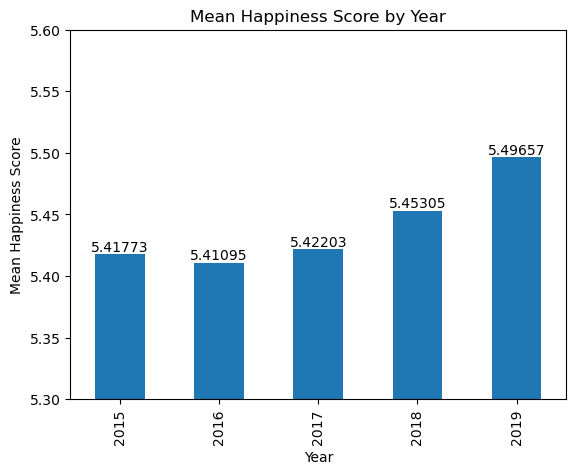

In [21]:
# Graph the mean of each year
mean = merged_df[['Year', 'Happiness Score']]
mean.set_index("Year", inplace=True)  # Set the index to "Year"
mean = mean.groupby("Year")['Happiness Score'].mean().to_frame()
ax = mean.plot(kind ='bar', title='Mean Happiness Score by Year', xlabel='Year', ylabel='Mean Happiness Score', legend=False)

# Zooming in on a specific range of values for better visualization
ax.set_ylim([5.3, 5.6])

# Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

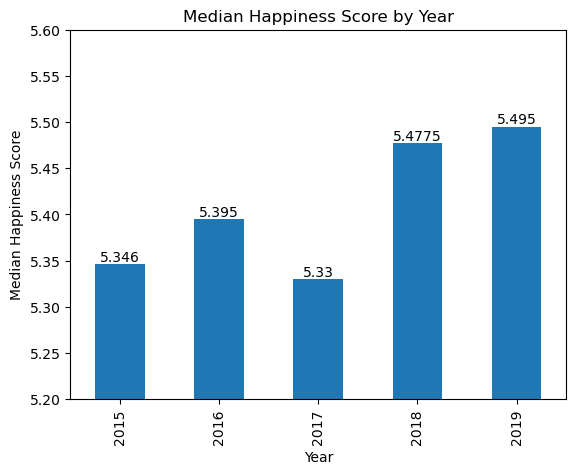

In [22]:
# Graph the median of each year
median = merged_df[['Year', 'Happiness Score']]
median.set_index("Year", inplace=True)  # Set the index to "Year"
median = median.groupby("Year")['Happiness Score'].median().to_frame()
ax = median.plot(kind ='bar', title='Median Happiness Score by Year', xlabel='Year', ylabel='Median Happiness Score', legend=False)

# Zooming in on a specific range of values for better visualization
ax.set_ylim([5.2, 5.6])

# Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

### EDA Task 01 - Discussion

### What are the central tendencies of happiness score over the years? Did they increase or decrease?

<p>By examining the two graphs, we can see that the Happiness Score tends to rise from 2015 to 2019, with the exception of a drop from 2016 to 2017. Additionally, the graph indicates that the data is skewed to the right, since the average Happiness Score remains higher than the median over time. To obtain a more precise representation of the sample set, it would be advisable to rely on the median, given the skewed distribution of the data.

Median Happiness Scores by Year:
- 2015: 5.2325
- 2016: 5.3822
- 2017: 5.2790
- 2018: 5.3780
- 2019: 5.3795</p>

### EDA Task 02 - Start

### Which countries have stable rankings over the years? Which countries improved their rankings?

We will be looking at the countries from each year and compare their rankings between the years, so we will be dealing with the "Year", "Country", and "Happiness Rank" features from our dataset. We have determined that a country is considered to have stable rankings over the years if they (1) appear in all 5 years, 2015-2019, and (2) have their happiness ranks be between a range of 5 ranks. When determining which countries have improved their rankings, we identify any country that has (1) appeared in all 5 years and (2) have an improvement of 1 or more ranks when looking at year 2015 and year 2019.

In [23]:
# This part will be focused on identifying the countries that have stable rankings over the
# years. We identify a country as having stable rankings if the range of the largest ranking
# and smallest ranking in the five year time period is less than or equal to 5.

# Creating a dictionary to store the range of rankings for each country in the five year period.
rank_range = {}

# Looping through each country in the dataframe. Looking at the unique values for this part.
for country in merged_df['Country'].unique():
    # Creating a list to store the rankings for the current country.
    ranks = []
    # Looping through each year to check the ranking.
    for year in merged_df['Year'].unique():
        # Getting the happiness rank for this country in the current year.
        rank = merged_df.loc[(merged_df['Country'] == country) & (merged_df['Year'] == year), 'Happiness Rank'].values
        # Checking to see if the country is ranked or not in this year. If no rank, skip it.
        if len(rank) == 0:
            continue
        # Appending the acquired happiness rank to the list.
        ranks.append(rank[0])
    # Calculating the range of the ranks and storing into the rank_range dictionary.
    rank_range[country] = max(ranks) - min(ranks)

# Getting a list of countries with at most a range of 5 ranks between the years.
# This is how we identify the definition of stable country in this assignment.
stable_countries = [country for country, rank in rank_range.items() if rank <= 5]
print("Stable countries:")
print(stable_countries)
print("The number of countries that have stable rankings over the years is:",len(stable_countries))

Stable countries:
['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Costa Rica', 'Austria', 'Luxembourg', 'Ireland', 'Belgium', 'Uruguay', 'Trinidad and Tobago', 'Slovakia', 'Madagascar', 'Rwanda', 'Syria']
The number of countries that have stable rankings over the years is: 21


In [24]:
# Creating a new dataframe with only the stable countries from the merged_df dataframe.
stable_df = merged_df[merged_df['Country'].isin(stable_countries)]

# Creating a pivot table to display the happiness rank for each year and stable country.
# This will be used to clearly visualize the happiness rank of a stable country from the
# year 2015 to 2019. It can also let us see if there are any errors in our code above to
# sort out the countries with rank range of 5 or less. 
pivot_df = stable_df.pivot_table(values='Happiness Rank', index='Country', columns='Year')

# Displaying the pivot table to the user.
pivot_df

# We can observe the 21 countries that have stable rankings over the years
# between 2015 and 2019. We excluded the countries that had a ranking or more
# missing in any of the five years for a more consistent analysis. There were
# previously several entries with NaN values, which indicated that there was
# no rank in one or more years. There countries in the pivot table below all 
# appear in the five years, and their range of change is less than 5 ranks,
# which we used to determine whether or not the country was stable ranking.

Year,2015,2016,2017,2018,2019
Country,,,,,
Australia,10,9,10,10,11
Austria,13,12,13,12,10
Belgium,19,17,17,16,18
Canada,5,6,7,7,9
Costa Rica,12,14,12,13,12
Denmark,3,1,2,3,2
Finland,6,5,5,1,1
Iceland,2,3,3,4,4
Ireland,18,18,15,14,16


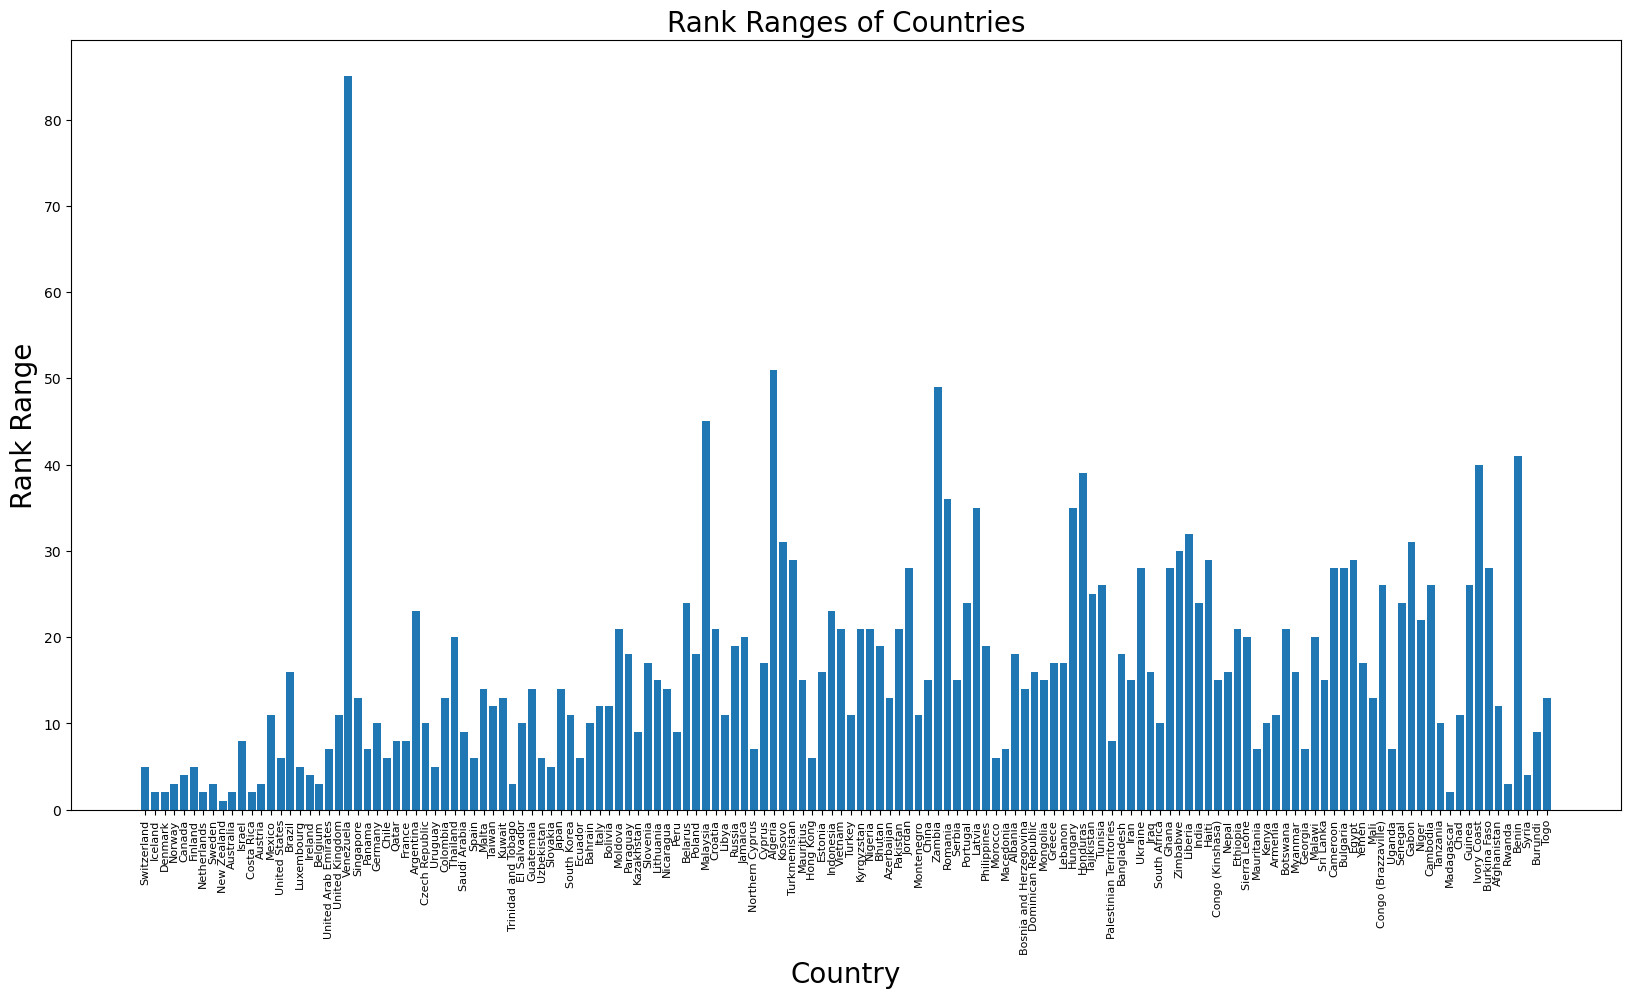

In [25]:
# Creating a bar plot of the rank ranges for each country. This is to visualize all the countries and their ranges
# but there are so many countries that the names/labels are blurred together. We already know which countries
# are stable through the years, but this is purely for visualization of all the countries.
plt.figure(figsize=(20, 10))
plt.bar(range(len(rank_range)), list(rank_range.values()))
plt.xticks(range(len(rank_range)), list(rank_range.keys()), rotation=90, fontsize=8)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Rank Range', fontsize=20)
plt.title('Rank Ranges of Countries', fontsize=20)
plt.show()

# By observing the bar graph of all the countries and their Happiness ranking ranges through the years,
# we notice that there are plenty of countries that were not stable whatsoever. For example, the taller the
# bar, the more unstable the country's ranking was. The largest rank range is greater than 80, which means
# that the country either increased 80+ ranks or they decreased 80+ ranks. This is significant in terms of 
# rank changes throughout the years. 

In [26]:
# This part will be focused on identifying the countries that have improved their
# rankings. We interpreted the improvement as having increased their Happiness Rank
# by 1 or more from 2015 to 2019. For example, if a country X has a rank of 11 in 2015
# and a rank of 10 in 2019, we classify this as having their ranking improved.

# Creating a dictionary to store the rank change for each country.
rank_change = {}

# Looping through each country in the dataframe merged_df.
for country in merged_df['Country'].unique():
    # Getting the happiness rank for each year for this country
    ranks = merged_df.loc[merged_df['Country'] == country, 'Happiness Rank'].values
    # Checking to see if the country is not ranked in all years. If a country doesn't
    # have a rank in all 5 years, then we will skip that country.
    if len(ranks) != 5:
        continue
    # Checking to see if the country has improved its ranking by comparing
    # the happiness rank in 2019 and the rank in 2015. If the 2019 rank is
    # less than 2015 rank, then this means the country's ranking improved.
    if ranks[4] < ranks[0]:
        # Calculating the happiness rank change between 2015 and 2019.
        change = ranks[0] - ranks[4]
        # Storing the ranking change in the dictionary rank_change.
        rank_change[country] = change

# Creating a dataframe with the countries that have improved their rankings
# between 2015 and 2019. The change stored would be a positive value to 
# indicate that the country increased their ranking. The value would be 
# greater than or equal to 1, since that is our standard for rank improvement.

improved_df = merged_df[merged_df['Country'].isin(rank_change.keys())]
improved_df = improved_df.pivot(index='Country', columns='Year', values='Happiness Rank')
improved_df['Rank Change'] = [rank_change[country] for country in improved_df.index]

# Displaying the dataframe of the countries that have improved their ranking from 2015 to 2019.
# The pivot table would have the countries listed within the "Country" feature and the Happiness
# Rank associated with each year from 2015-2019 next to their respective country. The last column
# "Rank Change" would indicate the positive improvement to the country's ranking.
improved_df

Year,2015,2016,2017,2018,2019,Rank Change
Country,,,,,,
Armenia,118,114,117,124,113,5
Austria,13,12,13,12,10,3
Bahrain,47,40,41,43,37,10
Belgium,19,17,17,16,18,1
Benin,143,142,136,131,102,41
...,...,...,...,...,...,...
Taiwan,37,34,33,26,25,12
Tajikistan,99,95,94,87,74,25
Togo,146,144,142,133,133,13


In [27]:
# From the printed dataframe above of the countries with improved Happiness ranking, we can see that there are 
# 70 countries that fit this description. I will now print out the names of all the countries so we can actually
# see all of them with ease.

print("These are the 70 countries that had their happiness rank improve from 2015 to 2019:")
rank_change.keys()


These are the 70 countries that had their happiness rank improve from 2015 to 2019:


dict_keys(['Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Austria', 'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Germany', 'France', 'Czech Republic', 'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'El Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Bahrain', 'Italy', 'Slovenia', 'Lithuania', 'Nicaragua', 'Poland', 'Jamaica', 'Cyprus', 'Kosovo', 'Mauritius', 'Estonia', 'Pakistan', 'Montenegro', 'Romania', 'Serbia', 'Portugal', 'Latvia', 'Philippines', 'Macedonia', 'Bosnia and Herzegovina', 'Dominican Republic', 'Mongolia', 'Greece', 'Lebanon', 'Hungary', 'Honduras', 'Tajikistan', 'South Africa', 'Ghana', 'Nepal', 'Armenia', 'Georgia', 'Cameroon', 'Bulgaria', 'Mali', 'Congo (Brazzaville)', 'Senegal', 'Gabon', 'Niger', 'Cambodia', 'Chad', 'Guinea', 'Ivory Coast', 'Burkina Faso', 'Benin', 'Syria', 'Burundi', 'Togo'])

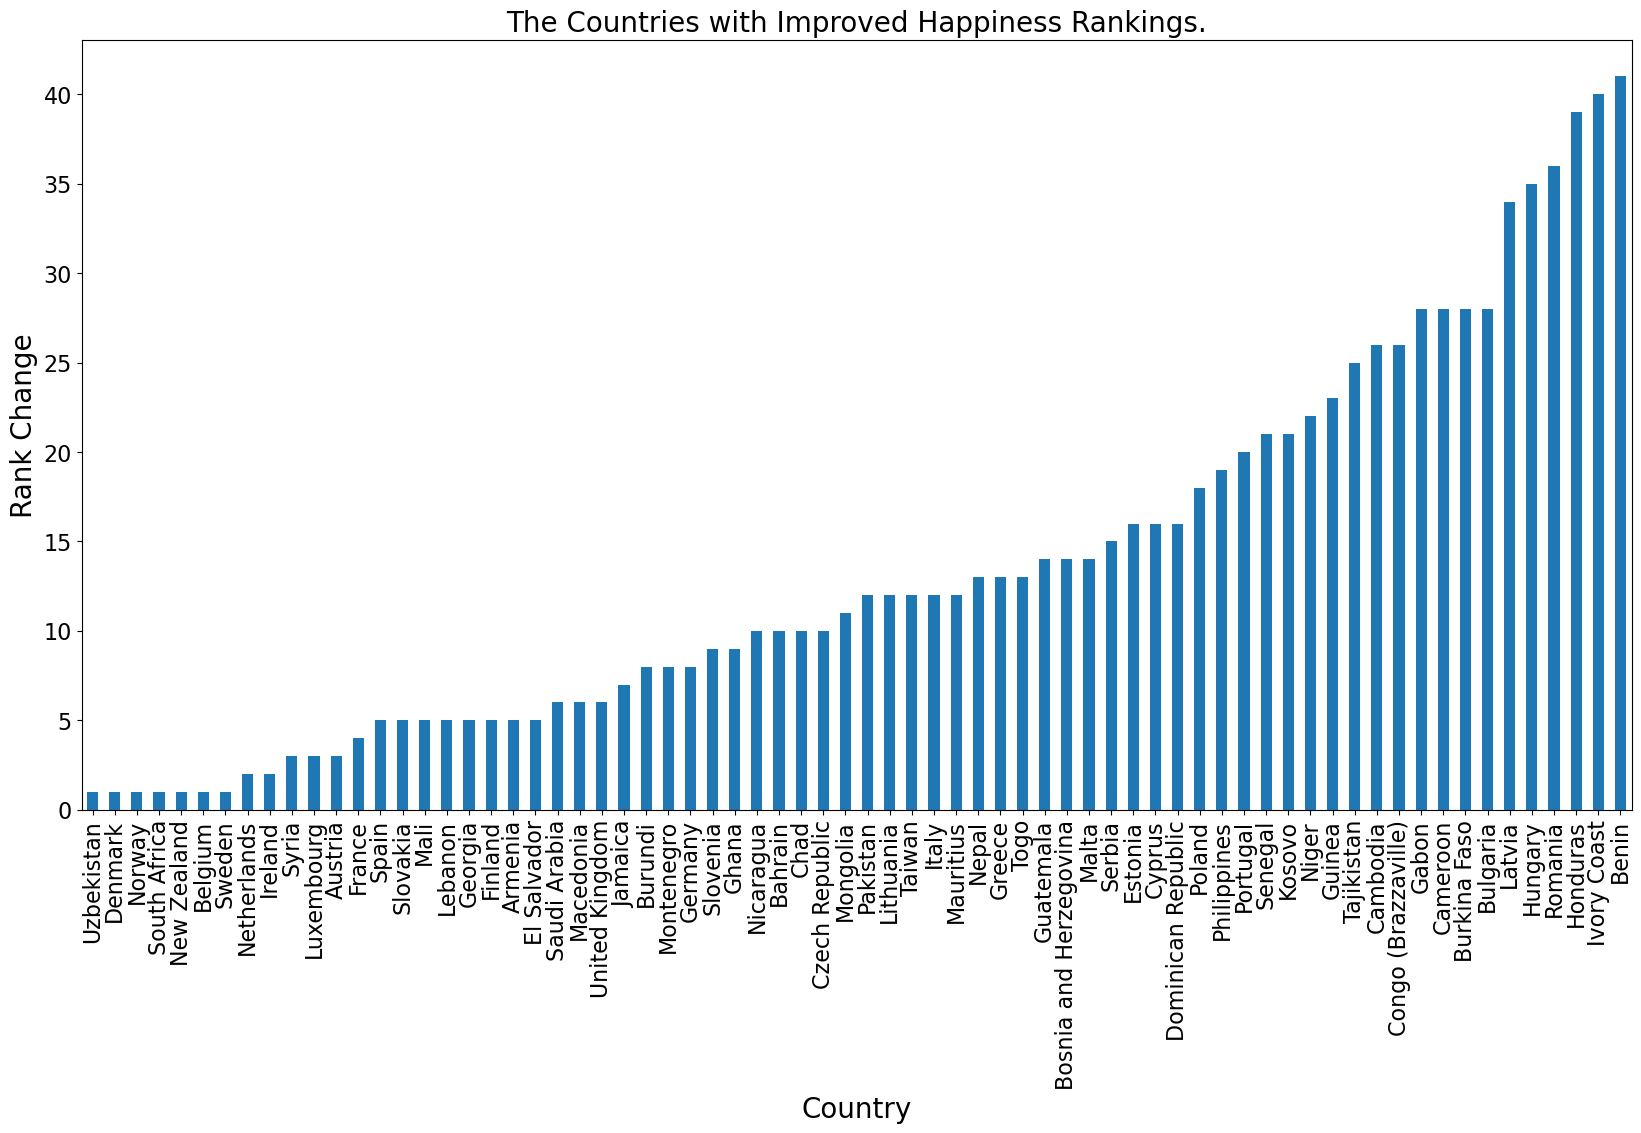

In [28]:
# We want to display the countries with improved happiness ranking but have it be more
# visually appealing so first we sort the rank changes of the countries in our dataframe
# from least to greatest.
improved_df = improved_df.sort_values(by='Rank Change')

# Creating a bar plot for the visualization of the countries with improved happiness ranks
# and their respective rank changes, aka how much their ranks increased from 2015 to 2019.
ax = improved_df['Rank Change'].plot.bar(rot=0, figsize=(20, 10))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.title("The Countries with Improved Happiness Rankings.", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
ax.set_ylabel("Rank Change", fontsize=20)
plt.show()

# We can see all 70 countries that had their happiness rank improve from 2015 to 2019.
# With the smallest increase being 1 and and the largest being around 40 ranks, we can 
# clearly see the differences in improvement between these countries.

In [29]:
# Printing out the actual statistics from the countries that showed improvement in rankings
# to observe the smallest improvements to the largest improvements.
# As we can see for certainty, the smallest increase of rank was 1, while the largest increase
# in rank was 41. These are good to know since these are significant increases to ranks.
improved_df['Rank Change'].describe()

count    70.000000
mean     13.485714
std      10.726836
min       1.000000
25%       5.000000
50%      11.500000
75%      19.750000
max      41.000000
Name: Rank Change, dtype: float64

### EDA Task 02 - Discussion

### Which countries have stable rankings over the years? Which countries improved their rankings? 

As we have seen from the analysis performed above, there were 21 countries that had stable Happiness rankings over the years. We classified a country as having stable rankings if the range of the happiness rank between all 5 years, 2015-2019, was equal to or less than 5 ranks. If there was a country that didn't appear in all 5 years, we didn't include them in our analysis. The countries that we identified as having stable rankings over the years are 'Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Costa Rica', 'Austria', 'Luxembourg', 'Ireland', 'Belgium', 'Uruguay', 'Trinidad and Tobago', 'Slovakia', 'Madagascar', 'Rwanda', 'Syria'.

-----

In the analysis of the countries that have improved their rankings, we identified 70 countries that fit our requirements of having increased 1 or more ranks from 2015 to 2019. If a country X had rank 10 in 2015 and rank 9 in 2019, then that was considered an improvement in their happiness rank. The smallest increase in ranks was 1, while the largest increase in ranks was 41. The 70 countries are 'Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Austria', 'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Germany', 'France', 'Czech Republic', 'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'El Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Bahrain', 'Italy', 'Slovenia', 'Lithuania', 'Nicaragua', 'Poland', 'Jamaica', 'Cyprus', 'Kosovo', 'Mauritius', 'Estonia', 'Pakistan', 'Montenegro', 'Romania', 'Serbia', 'Portugal', 'Latvia', 'Philippines', 'Macedonia', 'Bosnia and Herzegovina', 'Dominican Republic', 'Mongolia', 'Greece', 'Lebanon', 'Hungary', 'Honduras', 'Tajikistan', 'South Africa', 'Ghana', 'Nepal', 'Armenia', 'Georgia', 'Cameroon', 'Bulgaria', 'Mali', 'Congo (Brazzaville)', 'Senegal', 'Gabon', 'Niger', 'Cambodia', 'Chad', 'Guinea', 'Ivory Coast', 'Burkina Faso', 'Benin', 'Syria', 'Burundi', 'Togo'.

### EDA Task 03 - Start

### Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc.

We have decided to use pairwise Pearson correlation analysis on the feature "Happiness Score" paired with the other features from the dataframe. To visualize the relationship between the happiness score and the other features, I will show the Pearson correlation result with a heat map to find the most positive and negative correlations.

In [30]:
# Making a copy of the merged_df so we can drop the 'Year' feature since we don't believe it contributes to
# the happiness score from one year to the next. The other features contribute to the happiness score.
copy_df = merged_df.copy()
copy_df = copy_df.drop(['Year'], axis=1)

# Applying the pearson correlation function on the new dataframe that we have.
happ_score_corr = copy_df.corr(method='pearson')

# Displaying the Pearson correlation chart.
happ_score_corr

,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.991574,-0.795949,-0.636041,-0.732785,-0.532582,-0.404428,-0.123388,-0.499584
Happiness Score,-0.991574,1.000000,0.792706,0.650723,0.735823,0.544978,0.417807,0.136348,0.500271
GDP per Capita,-0.795949,0.792706,1.000000,0.565378,0.777450,0.355159,0.358662,0.000387,0.059029
Family or Social Support,-0.636041,0.650723,0.565378,1.000000,0.561710,0.450583,0.150811,-0.021344,-0.057417
Life Expectancy,-0.732785,0.735823,0.777450,0.561710,1.000000,0.333889,0.289216,-0.001701,0.030896
Freedom,-0.532582,0.544978,0.355159,0.450583,0.333889,1.000000,0.471011,0.295691,0.016199
Trust,-0.404428,0.417807,0.358662,0.150811,0.289216,0.471011,1.000000,0.305521,-0.012410
Generosity,-0.123388,0.136348,0.000387,-0.021344,-0.001701,0.295691,0.305521,1.000000,-0.074125
Dystopia Residual,-0.499584,0.500271,0.059029,-0.057417,0.030896,0.016199,-0.012410,-0.074125,1.000000


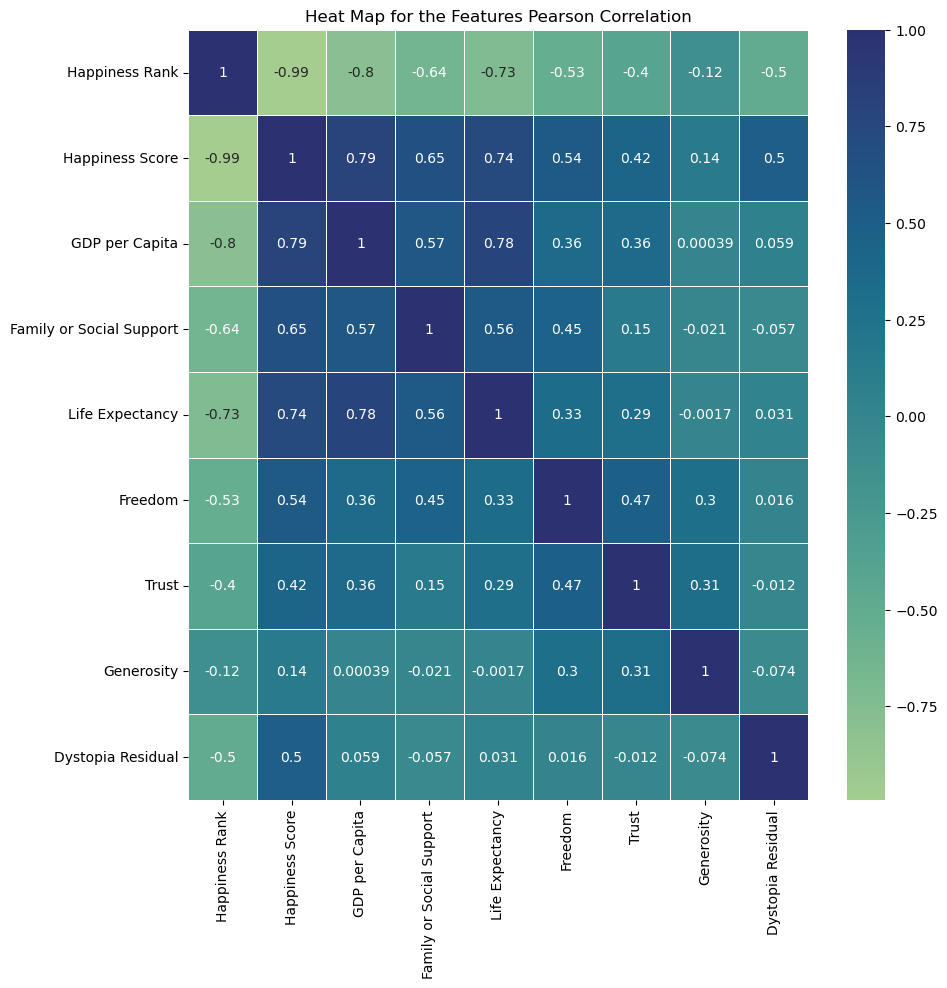

In [31]:
# Displaying the heat map of the Pearson correlation result.

fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(happ_score_corr, cmap='crest', annot=True, linewidths=0.5)
ax.set_title("Heat Map for the Features Pearson Correlation")
plt.show()

### EDA Task 03 - Discussion

### Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc.

We used pearson correlation to find the correlation coefficients between each of the features in our dataframe, which we then used to display a heatmap using Seaborn. The clear visualization shows what features are more negatively correlated, neutral, or more positively correlated. The colors closest to dark blue indicate a moderatetly positive correlation, while a lighter and more green/light green color indicates a negative correlation.

----

These are the Pearson correlation coefficients between Happiness Score and: Happiness Rank (-0.99), GDP per Capita (0.79), Family or Social Support (0.65), Life Expectancy (0.74), Freedom (0.54), Trust (0.42), Generosity (0.14), and Dystopia Residual (0.5). 
* Happiness Rank (-0.99) - The correlation coefficient is practically -1.0, which indicates a negative correlation between happiness rank and the happiness score. The lower the numerical value is of the happiness rank, the higher the the happiness score the country has. This is obvious, there is an inverse relationship between these two values. 
* GDP per Capita (0.79) - The correlation coefficient is relatively close to 1.0, which indicates a moderately positive correlation between the happiness score and GDP per Capita of a country. This makes sense since a wealthier country has more people that are happy since there is less poverty among the general population.
* Family or Social Support (0.65) - The correlation coefficient is closer to 1.0 than it is to 0. This indicates a relatively positive correlation between the happiness score and the family/social support. This means that if a country has families that are close with each other and/or able to befriend one another more easily, then they would generally be more happy. This makes sense since people with friends and/or a loving family are definitely not going to feel any signs of depression.
* Life Expectancy (0.74) - The correlation coefficient is relatively close to 1.0, which indicates a moderately positive correlation between the happiness score and life expectancy of a country. This means that if a country has a greater life expectancy, they are more likely to be happy. This makes sense since happy people are less stressed, which leads to less health problems that arise from stress.
* Freedom (0.54) - The correlation coefficient is relatively between the 0 and 1.0 mark, which indicates a moderately positive correlation between the happiness score and freedom of a country. This means that if a country has a greater perceived amount of freedom, then the people will be more happy. I expected the coefficient to be greater, but I guess with some countries like the USA, even though there is freedom, many people are unhappy whether it be poverty, inequality, politics, etc.
* Trust (0.42) - The correlation coefficient is relatively between the 0 and 1.0 mark, which indicates some level of positive correlation between the happiness score and trust in government of the country. This means that if the people have a greater in the government, more generally they are happier. It is not closer to 1.0 because there could be some countries where the people don't trust the government as much, but are still relatively happy.
* Generosity (0.14) - The correlation coefficient is relatively close to 0, which indicates a neutral correlation between the happiness score and generosity of a country. This means that the country's happiness doesn't necessarily depend on whether or not the people are nice to each other. They could be hesitant when people request donations, but this doesn't affect their happiness. 
* Dystopia Residual (0.5) - The correlation coefficient is between the 0 and 1.0 mark, which indicates a moderately positive correlation between the happiness score and dystopia residual of the features provided in the dataframe. 

### EDA Task 04 - Start

### Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?

To understand the factors that may have led to a increase in happiness scores of certain countries, we have identified the top ten countries that showed the greatest improvement in their rankings over the past five years. We determined this list by sorting countries according to their change in rank in decending order. During this period, those that experienced the smallest decline in rank being regarded as the most improved.

In [32]:
def year_to_feature(col, feature, countries):
    #Create new dataframe for displaying most improved countires
    temp_df = pd.DataFrame(columns=['Country', '2015', '2016', '2017', '2018', '2019', 'STDEV', feature])
    filtered_df = pd.concat(df_list, ignore_index=True)
    
    for country in countries:
        country_df = filtered_df[filtered_df['Country']==country].reset_index()    
        stdev = country_df[col].std()
        change_in_ranking = (country_df.loc[4, col] - country_df.loc[0, col]) / 5

        new_row = {'Country': country,
                    '2015': country_df.loc[0, col],
                    '2016': country_df.loc[1, col],
                    '2017': country_df.loc[2, col],
                    '2018': country_df.loc[3, col],
                    '2019': country_df.loc[4, col],
                    'STDEV': stdev,
                    feature: change_in_ranking}

        temp_df = pd.concat([temp_df, pd.DataFrame([new_row])])

    #Sort the newly created df by change_in_ranking. The lower the value the better.
    return temp_df.sort_values(feature, ascending=True)

countries = df_list[0]['Country']
df_sorted = year_to_feature('Happiness Rank', 'Change In Range', countries)

#Top 10 most improved countries
most_improved = df_sorted.head(10)

#Save the countries to an array
top = most_improved['Country'].to_numpy()

most_improved

,Country,2015,2016,2017,2018,2019,STDEV,Change In Range
0,Benin,143,142,136,131,102,16.813685,-8.2
0,Ivory Coast,139,130,124,105,99,16.890826,-8.0
0,Honduras,98,98,90,71,59,17.455658,-7.8
0,Romania,84,68,56,51,48,14.758049,-7.2
0,Hungary,97,87,74,68,62,14.258331,-7.0
0,Latvia,87,65,53,52,53,14.966630,-6.8
0,Burkina Faso,140,134,129,117,112,11.674759,-5.6
0,Gabon,132,126,114,101,104,13.483323,-5.6
0,Bulgaria,125,122,103,98,97,13.472194,-5.6
0,Cameroon,124,107,105,97,96,11.256109,-5.6


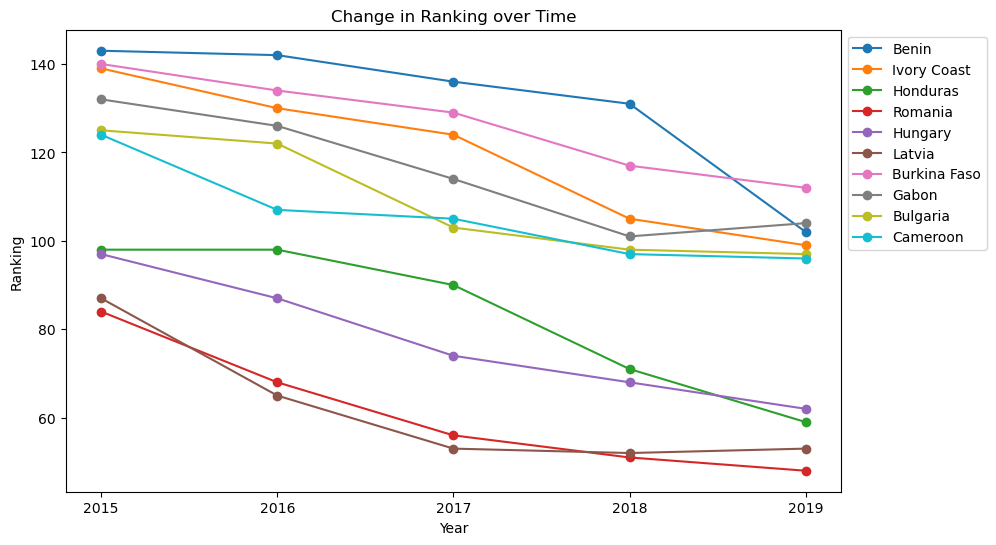

In [33]:
def graph_df(df, ylabel, title):
    # Extract data for the plot
    x = df.columns[1:-2]
    y = df.values[:, 1:-2].T
    y = y.transpose()
    labels = df['Country'].values

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Plot the data
    for i in range(y.shape[0]):
        ax.plot(y[i], '-o', label=labels[i])
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.show()
    
graph_df(most_improved, 'Ranking', 'Change in Ranking over Time')

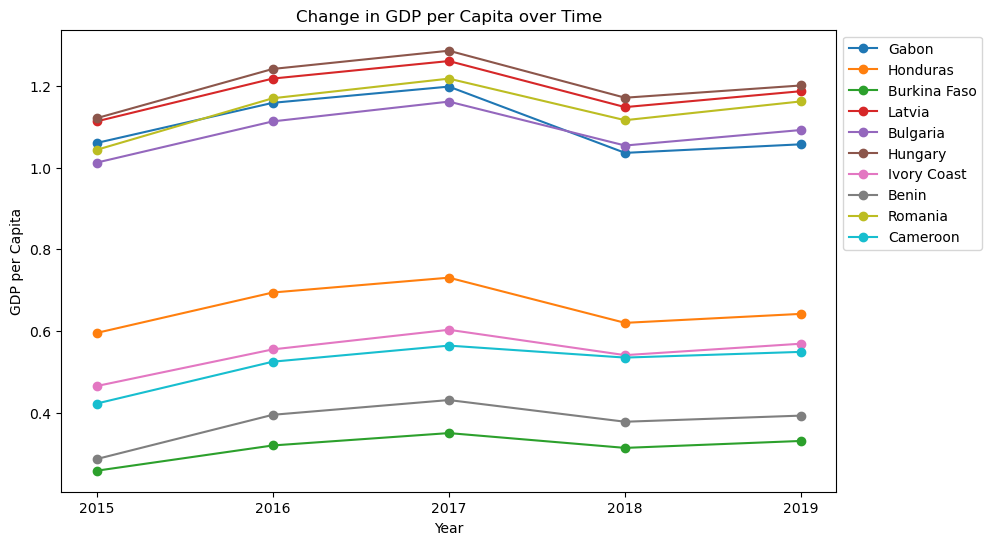

In [34]:
gdp_df = year_to_feature('GDP per Capita', 'change_in_GDP', top)
graph_df(gdp_df, 'GDP per Capita', 'Change in GDP per Capita over Time')

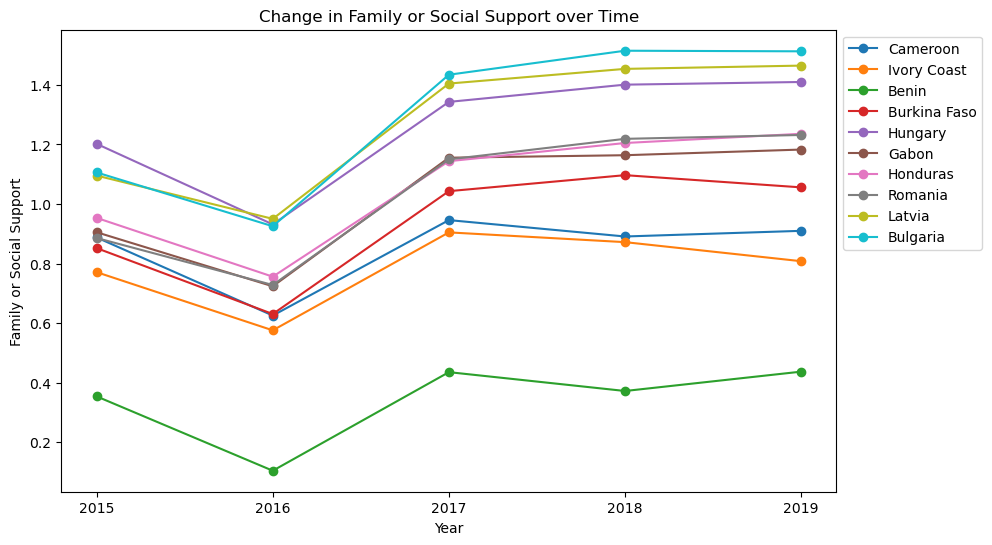

In [35]:
social_df = year_to_feature('Family or Social Support', 'change_in_social', top)
graph_df(social_df, 'Family or Social Support', 'Change in Family or Social Support over Time')

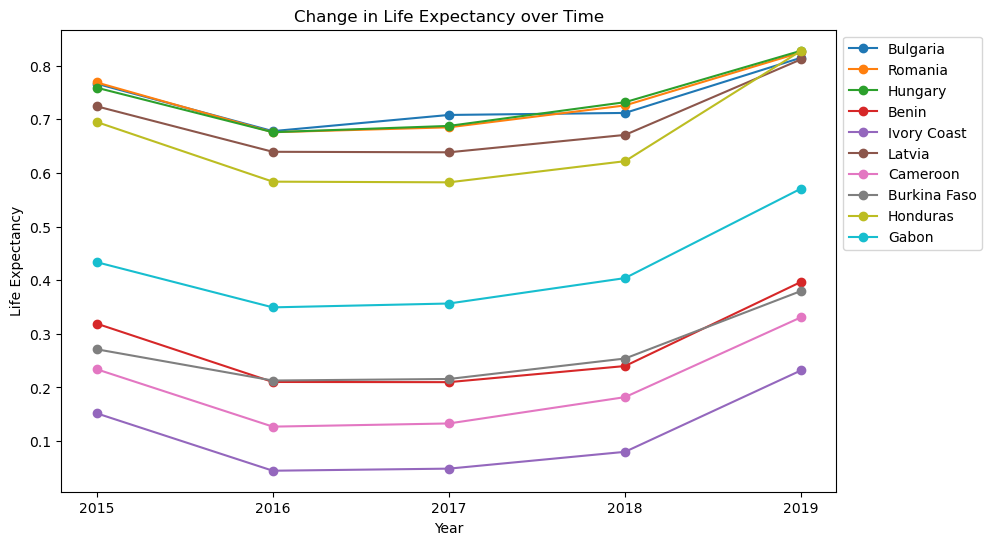

In [36]:
life_df = year_to_feature('Life Expectancy', 'change_in_life', top)
graph_df(life_df, 'Life Expectancy', 'Change in Life Expectancy over Time')

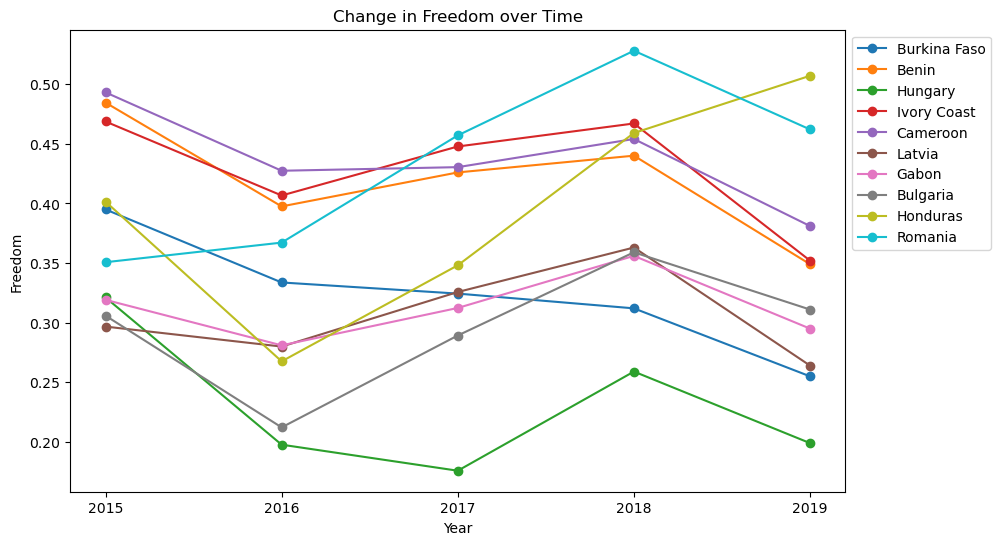

In [37]:
freedom_df = year_to_feature('Freedom', 'change_in_freedom', top)
graph_df(freedom_df, 'Freedom', 'Change in Freedom over Time')

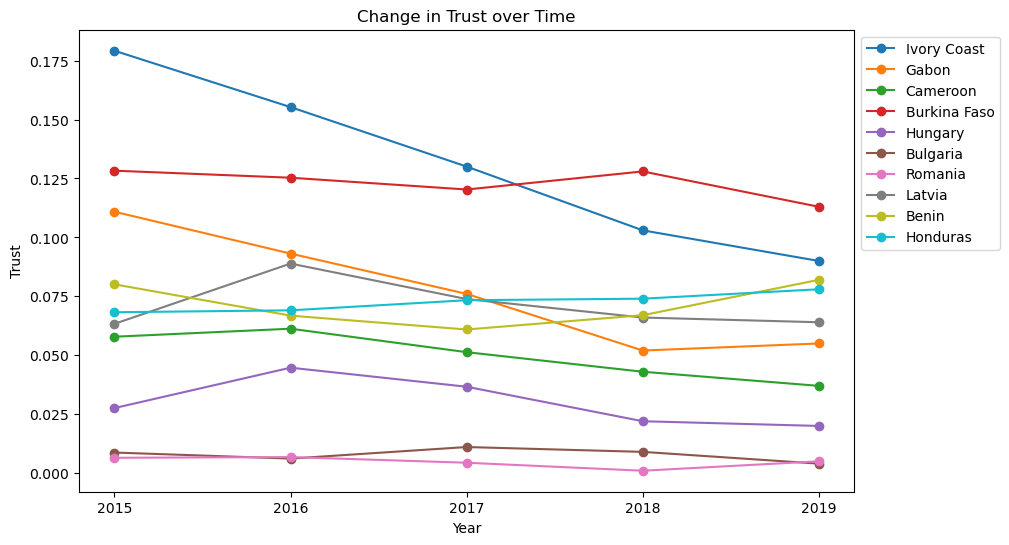

In [38]:
trust_df = year_to_feature('Trust', 'change_in_trust', top)
graph_df(trust_df, 'Trust', 'Change in Trust over Time')

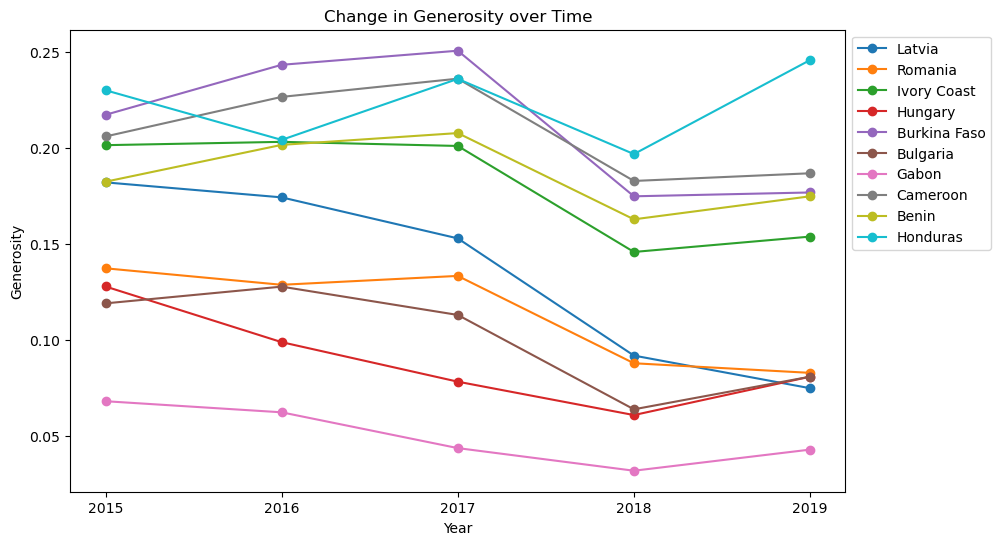

In [39]:
generosity_df = year_to_feature('Generosity', 'change_in_generosity', top)
graph_df(generosity_df, 'Generosity', 'Change in Generosity over Time')

### EDA Task 04 - Discussion

### Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?

As hypothetical presidents, we would prioritize the social and health sectors of the country because these aspects have exhibited consistent improvement across all of the top ten countries, and are areas that can potentially be enhanced through government action.

Nonetheless, it is important to bear in mind that correlation does not necessarily imply causation. Moreover, it is essential to recognize that each country has its unique circumstances, and we cannot presume that the same approach would be effective across all nations, particularly in the case of developing versus first-world countries.

# Modeling - Building Three Models based on data from year 2015 to year 2018

## Creating Training Data

The training data will be all the values that have years 2015 to 2018, while the testing data will be the data entries with year 2019. In doing so, we can train our models with the correct data entries that can be tested against the actual 2019 values later.

In [40]:
# Create a copy
df_copy = merged_df.copy()

# Seperate give data into test and train
df_train = df_copy[df_copy['Year'] != 2019]
df_test = df_copy[df_copy['Year'] == 2019]

# Prepare input and output for test and train
X_train = df_train.drop(['Happiness Rank', 'Happiness Score','Country'], axis=1)
y_train = df_train['Happiness Score']

X_test = df_test.drop(['Happiness Rank', 'Happiness Score', 'Country'], axis=1)
y_test = df_test['Happiness Score']

## Linear Regression Model

<p>Our first model will be the Linear Regression model, which is a widely used method for predicting numerical values. It is straightforward to understand, efficient to compute, and can capture linear correlations between the target variable and features.</p>

In [41]:
# Set up linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the happiness score
y_pred = lr.predict(X_test)

# Calculating the R-squared score, which is also known as the coefficient of determination.
# This is a measure that determines the accuracy of fit of a linear regression model.
# A score of 0 indicates that the model does not explain any variability in the dependent 
# variable and 1 indicates that the model perfectly explains the variability in the dependent variable.
r2_score = lr.score(X_test, y_test)
print("R-squared score:", r2_score)

# Turn array to a df
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Score'])

# Get the actual score and rank of the test set
actual_score = df_test['Happiness Score'].reset_index(drop=True)
actual_rank = df_test['Happiness Rank'].reset_index(drop=True)

# Create a new df by concating X_test and out predicted column
result = pd.concat([df_test['Country'].reset_index(drop=True), actual_score, y_pred_df, actual_rank], axis=1)

# Modify column names
result = result.rename(columns={"Happiness Score": "Actual Happiness Score", "Happiness Rank": "Actual Happiness Rank"})

# Sort the df by Predicted Score
result = result.sort_values(by=['Predicted Score'], ascending=False)

# Create new column base by ranking the Predicted Score
result['Predicted Rank'] = result['Predicted Score'].rank(ascending=False, method='dense').astype(int)

result.head(25)

# The R-squared score is very high, it is practically 1.0, which indicates that model perfectly explains
# the variability in the dependent variable. The linear regression model perfectly explains the variation
# in the happiness score that it was trained on and tested for. 

R-squared score: 0.9999999992960672


,Country,Actual Happiness Score,Predicted Score,Actual Happiness Rank,Predicted Rank
0,Finland,7.769,7.768931,1,1
1,Denmark,7.600,7.599950,2,2
2,Norway,7.554,7.553964,3,3
3,Iceland,7.494,7.493994,4,4
4,Netherlands,7.488,7.487976,5,5
5,Switzerland,7.480,7.479959,6,6
6,Sweden,7.343,7.342959,7,7
7,New Zealand,7.307,7.306962,8,8
8,Canada,7.278,7.277965,9,9
9,Austria,7.246,7.245971,10,10


In [42]:
# Calculate root mean squared error of our linear regression model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", round(rmse, 15))
print("Predicted values range from:", round(y_pred.min(), 3), "to", round(y_pred.max(), 3))
print("Actual values range from: " + str(y_test.min()) + " to " + str(y_test.max()))

Root Mean Squared Error:  2.8604753566e-05
Predicted values range from: 3.203 to 7.769
Actual values range from: 3.203 to 7.769


## Linear Regression Model - Discussion

<p>The Root Mean Squared Error is significantly lower than the actual values we are trying to predict, indicating that the model is highly accurate and performs well in predicting the target variable.</p>

## Gradient Boosting Model
<p>Our second model is the gradient boosting model. This model is popular for both regression and classification. It combines multiple weak learners (decision trees) to build a strong learner. It has high accuracy and reduces overfitting. 

In [43]:
# Set up a Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, random_state = 42)
gbr.fit(X_train, y_train)

# Predict happiness score
y_pred = gbr.predict(X_test)

# Calculating the R-squared score, which is also known as the coefficient of determination.
# This is a measure that determines the accuracy of fit of a linear regression model.
# A score of 0 indicates that the model does not explain any variability in the dependent 
# variable and 1 indicates that the model perfectly explains the variability in the dependent variable.
r2_score = gbr.score(X_test, y_test)
print("R-squared score:", r2_score)

# Turn array to a df
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Score'])

# Get the actual score and rank of the test set
actual_score = df_test['Happiness Score'].reset_index(drop=True)
actual_rank = df_test['Happiness Rank'].reset_index(drop=True)

# Create a new df by concating X_test and out predicted column
result = pd.concat([df_test['Country'].reset_index(drop=True), actual_score, y_pred_df, actual_rank], axis=1)

# Modify column names
result = result.rename(columns={"Happiness Score": "Actual Happiness Score", "Happiness Rank": "Actual Happiness Rank"})

# Sort the df by Predicted Score
result = result.sort_values(by=['Predicted Score'], ascending=False)

# Create new column base by ranking the Predicted Score
result['Predicted Rank'] = result['Predicted Score'].rank(ascending=False, method='dense').astype(int)

# Reset index
result = result.reset_index(drop = True)

result.head(25)

# The R-squared value is very high, while being relatively close to the score of 1.0. This means
# that the gradient boosting model nearly perfectly explains the variability in the happiness score.
# Looking at the actual and predicted happiness scores, we do see some differences here and there, but
# the model isn't too off in predicting, which the predicted ranks are close to where the actual ones are.
# Unlike the linear regression model, this gradient boosting model is less accurate in its predictive 
# capabilities, where the r-squared scores signify this difference (0.9999999999 as opposed to 0.95909368).

R-squared score: 0.9590936896435144


,Country,Actual Happiness Score,Predicted Score,Actual Happiness Rank,Predicted Rank
0,Finland,7.769,7.491665,1,1
1,Iceland,7.494,7.418707,4,2
2,Denmark,7.600,7.413234,2,3
3,Switzerland,7.480,7.290008,6,4
4,Canada,7.278,7.222434,9,5
5,New Zealand,7.307,7.193163,8,6
6,Norway,7.554,7.145331,3,7
7,Netherlands,7.488,7.139219,5,8
8,Sweden,7.343,7.133363,7,9
9,Costa Rica,7.167,7.046315,12,10


In [44]:
# Calculate root mean squared error of our gradient boosting model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", round(rmse, 15))
print("Predicted values range from:", round(y_pred.min(), 3), "to", round(y_pred.max(), 3))
print("Actual values range from: " + str(y_test.min()) + " to " + str(y_test.max()))

Root Mean Squared Error:  0.218055861410881
Predicted values range from: 3.485 to 7.492
Actual values range from: 3.203 to 7.769


## Gradient Boosting Model - Conclusion

<p>The Root Mean Squared Error is still relatively low in this model, however it is not as good as the linear regression model. In this model's case, the predicted values are, on average, 0.2181 apart from the actual value.</p>

## Random Forest Model

Our third model is the Random Forest model, which is an ensemble learning model for classification and regression. The model is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Random forests combine predictions from other models, in this case they're decision trees. 

In [45]:
# Setting up the Random Forest model with the parameter n_estimators equaling 150,
# which specify the number of decision trees that will be created in the random forest.
# The parameter random_state is used to set the seed for the random number generator
# used by the algorithm. Here it is 68, so the same sequence of random numbers will be
# generated each time the algorithm is run. 
rf_model = RandomForestRegressor(n_estimators=150, random_state=68)

# Training the random forest model by fitting it to our training datasets.
rf_model.fit(X_train, y_train)

# Using the random forest model to predict values against the testing dataset.
y_pred_rf = rf_model.predict(X_test)

# Calculating the R-squared score, which is also known as the coefficient of determination.
# This is a measure that determines the accuracy of fit of a linear regression model.
# A score of 0 indicates that the model does not explain any variability in the dependent 
# variable and 1 indicates that the model perfectly explains the variability in the dependent variable.
r2_score = rf_model.score(X_test, y_test)
print("R-squared score:", r2_score)

# Turn array to a df
y_pred_df = pd.DataFrame(y_pred_rf, columns=['Predicted Score'])

# Get the actual score and rank of the test set
actual_score = df_test['Happiness Score'].reset_index(drop=True)
actual_rank = df_test['Happiness Rank'].reset_index(drop=True)

# Create a new df by concating X_test and out predicted column
result = pd.concat([df_test['Country'].reset_index(drop=True), actual_score, y_pred_df, actual_rank], axis=1)

# Modify column names
result = result.rename(columns={"Happiness Score": "Actual Happiness Score", "Happiness Rank": "Actual Happiness Rank"})

# Sort the df by Predicted Score
result = result.sort_values(by=['Predicted Score'], ascending=False)

# Create new column base by ranking the Predicted Score
result['Predicted Rank'] = result['Predicted Score'].rank(ascending=False, method='dense').astype(int)

result.head(25)

# The R-squared score is relatively high being at 0.9399, where the highest score
# is 1. This means that the model is nearly perfect in explaining the variability in 
# the dependent variable. The higher the R-squared value, the better the model is at 
# explaining the variation in the dependent variable, which in this case is the happiness score.
# Compared to the other two models, the Random forest model has the worst predictive capabilities
# out of the three regression models. As explained by the R-squared score, 9.398967 is a smaller
# value compared to linear regression's 0.9999999999 and gradient boosting's 0.959093689.

R-squared score: 0.9398967671481157


,Country,Actual Happiness Score,Predicted Score,Actual Happiness Rank,Predicted Rank
1,Denmark,7.600,7.408200,2,1
3,Iceland,7.494,7.353673,4,2
5,Switzerland,7.480,7.297200,6,3
0,Finland,7.769,7.208367,1,4
8,Canada,7.278,7.193987,9,5
2,Norway,7.554,7.192893,3,6
6,Sweden,7.343,7.149693,7,7
4,Netherlands,7.488,7.132620,5,8
7,New Zealand,7.307,7.102660,8,9
10,Australia,7.228,6.937307,11,10


In [46]:
# Calculating the root mean squared error of our random forest model.
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", round(rmse, 15))
print("Predicted values range from:", round(y_pred_rf.min(), 3), "to", round(y_pred_rf.max(), 3))
print("Actual values range from: " + str(y_test.min()) + " to " + str(y_test.max()))

Root Mean Squared Error:  0.26431482757063
Predicted values range from: 3.517 to 7.408
Actual values range from: 3.203 to 7.769


## Random Forest Model - Discussion

The Root Mean Squared Error in this Random Forest model is relatively high at 0.2643, where the actual range of happiness score ranges from 3.203 and 7.769. If a country's predicted value was 0.2643 off its actual value, it could potentially drop their happiness rank by more than 10 ranks from the official list. When I said drop happiness rank, the numerical value of the rank increases (1->12), where 1 is the best rank and 12 is a lower rank. The predicted range is from 3.517 to 7.408, while the actual range is 3.203 to 7.769. The predictive range was smaller, which means predictive capability could've been better.

## Equation

Since the linear regression model has the lowest root mean square error we choose to invent the our equation base on it's coefficient and it's intercept.

In [47]:
# Round the coefficients
new_coef = list(map(lambda num : round(num, 6), lr.coef_))

# Generate equation in string form
equation = "Happiness Score = "

for i, _ in enumerate(new_coef):
    if i != 0:
        equation += "(" + str(new_coef[i]) + "*X{}) + ".format(i)

equation += str(round(lr.intercept_, 6)) 

# Print out newly create equation
print(equation)

print(
"\n\
X1: GDP per capita\n\
X2: Family or Social Support\n\
X3: Life Expectancy\n\
X4: Freedom\n\
X5: Trust\n\
X6: Generosity\n\
X7: Dystopia Residual\
")

Happiness Score = (1.000047*X1) + (0.999984*X2) + (0.99988*X3) + (0.999961*X4) + (0.999884*X5) + (1.000147*X6) + (0.999984*X7) + -0.015099

X1: GDP per capita
X2: Family or Social Support
X3: Life Expectancy
X4: Freedom
X5: Trust
X6: Generosity
X7: Dystopia Residual
